# Data Exploration and Visualization of Predictive Manintenance Data

Download and read predictive maintenance data. Make Data Exploration by Pandas with all the techniques you know. Make inputation of null values. Plot all data distributions. Make scatterplots of some attributes and all the possible visualizations you know by Matplotlib and Seaborn. 

https://archive.ics.uci.edu/ml/datasets/AI4I+2020+Predictive+Maintenance+Dataset


*The dataset consists of 10 000 data points stored as rows with 14 features in columns*

In [ ]:

import pandas as pd
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00601/ai4i2020.csv")
#False no nulls
#print(df.isnull().values.any())
#False no nulls
#display(df)
#fillna

df_col = df.rename(columns={"Type": "Quality", "TWF": "Tool Wear Failure", "HDF": "Heat Dissipation Failure", "PWF": "Power Failure","OSF" : "Overstrain Failure","RNF" : "Random Failure"})
display(df_col)

False


,UDI,Product ID,Quality,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,Tool Wear Failure,Heat Dissipation Failure,Power Failure,Overstrain Failure,Random Failure
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [ ]:
#print(df.info())
display(df.info())
display(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

None

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000





***Attribute Information:***

**UID:** unique identifier ranging from 1 to 10000
product 

**ID:** consisting of a letter L, M, or H for low (50% of all products), medium (30%) and high (20%) as product quality variants and a variant-specific serial number

**air temperature [K]:** generated using a random walk process later normalized to a standard deviation of 2 K around 300 K

**process temperature [K]:** generated using a random walk process normalized to a standard deviation of 1 K, added to the air temperature plus 10 K.

**rotational speed [rpm]:** calculated from a power of 2860 W, overlaid with a normally distributed noise

**torque [Nm]:** torque values are normally distributed around 40 Nm with a Ïƒ = 10 Nm and no negative values.

**tool wear [min]:** The quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process. 

and a

**'machine failure'** label that indicates, whether the machine has failed in this particular datapoint for any of the following failure modes are true. 

In [ ]:
#print(df.iloc[:,:9])
display(df.iloc[:,:9])

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
0,1,M14860,M,298.1,308.6,1551,42.8,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0
...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0


*The machine failure consists of five independent failure modes*

**tool wear failure (TWF)**: the tool will be replaced of fail at a randomly selected tool wear time between 200 â€“ 240 mins (120 times in our dataset). At this point in time, the tool is replaced 69 times, and fails 51 times (randomly assigned).

**heat dissipation failure (HDF):** heat dissipation causes a process failure, if the difference between air- and process temperature is below 8.6 K and the toolâ€™s rotational speed is below 1380 rpm. This is the case for 115 data points.

**power failure (PWF):** the product of torque and rotational speed (in rad/s) equals the power required for the process. If this power is below 3500 W or above 9000 W, the process fails, which is the case 95 times in our dataset.

**overstrain failure (OSF):** if the product of tool wear and torque exceeds 11,000 minNm for the L product variant (12,000 M, 13,000 H), the process fails due to overstrain. This is true for 98 datapoints.

**random failures (RNF):** each process has a chance of 0,1 % to fail regardless of its process parameters. This is the case for only 5 datapoints, less than could be expected for 10,000 datapoints in our dataset.

*If at least one of the above failure modes is true, the process fails and the* **'machine failure'** *label is set to 1. It is therefore not transparent to the machine learning method, which of the failure modes has caused the process to fail* 

In [ ]:
#print(df.iloc[:,[0,1,2,8,9,10,11,12,13]])
display(df.iloc[:,[0,1,2,8,9,10,11,12,13]])

,UDI,Product ID,Type,Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,0,0,0,0,0,0
1,2,L47181,L,0,0,0,0,0,0
2,3,L47182,L,0,0,0,0,0,0
3,4,L47183,L,0,0,0,0,0,0
4,5,L47184,L,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,0,0,0,0,0,0
9996,9997,H39410,H,0,0,0,0,0,0
9997,9998,M24857,M,0,0,0,0,0,0
9998,9999,H39412,H,0,0,0,0,0,0


**Number of machines divided by type - (Low,Medium,High)?**

In [ ]:
display(df.groupby(by=['Type'])['Product ID'].count())

Type
H    1003
L    6000
M    2997
Name: Product ID, dtype: int64

**Number of machines divided by type - (Low,Medium,High)?(Plot)**

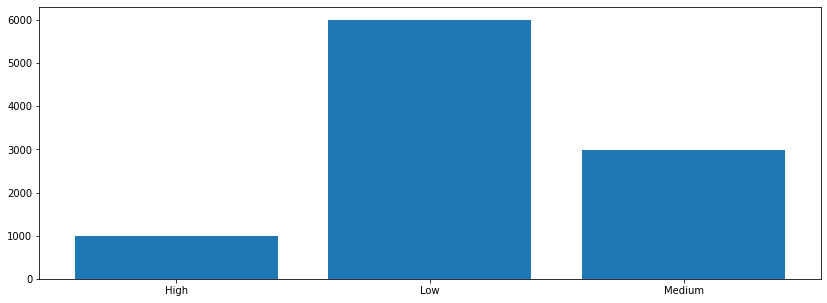

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
x = ['High','Low','Medium']
y = df.groupby(by=['Type'])['Product ID'].count()
ax.bar(x,y)
plt.show()

**In how many machines it had occurred any type of failure?**

In [ ]:
print(str(df[df['Machine failure'] == 1]['Product ID'].count()) + " machines have failed from " + str(df['Product ID'].count()) + " while " + str(df[df['Machine failure'] == 0]['Product ID'].count()) + " didn't presented any type of failure.")

339 machines have failed from 10000 while 9661 didn't presented any type of failure.


Plot machines where had occurred **'no failure(green)'** and with **'failure(red)'** occurrence



1003


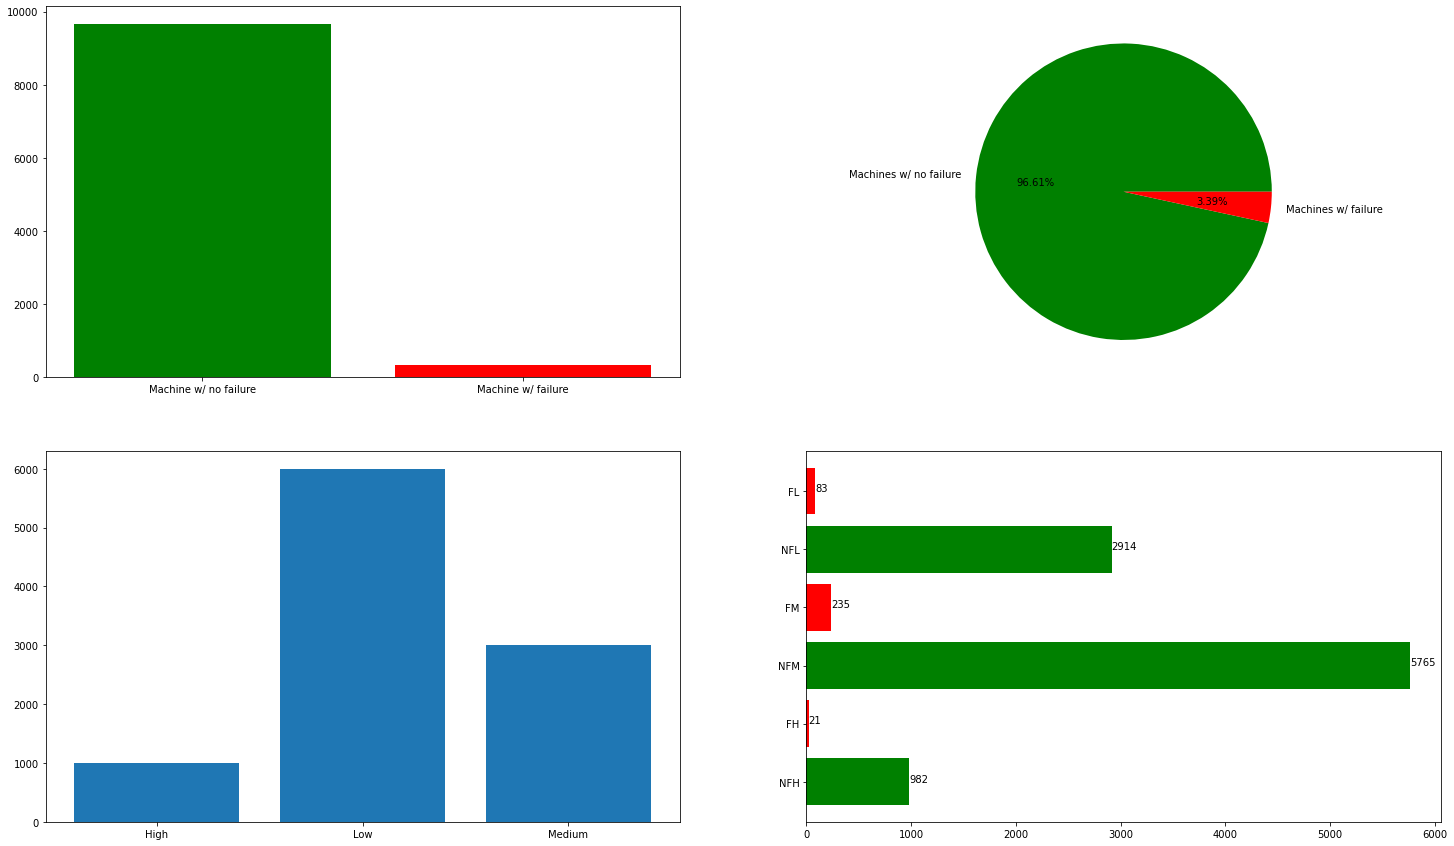

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,2)



#data - pie
machnf = df[df['Machine failure'] == 0]['Product ID'].count()
machf = df[df['Machine failure'] == 1]['Product ID'].count()
x = ['Machine w/ no failure','Machine w/ failure']
y = [machnf,machf]
ax[0,0].bar(x,y,linewidth=170,color=['green','red'])


#(machnf*100)/len(df)
def perc_value(val): 
  return str(round(val,2)) + "%"

x = [machnf,machf]
ax[0,1].pie(x,colors=['green','red'],labels=["Machines w/ no failure","Machines w/ failure"],autopct=perc_value)

x = ['High','Low','Medium']
y = df.groupby(by=['Type'])['Product ID'].count()
print(y[0])
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
#addlabels(x, y)
ax[1,0].bar(x,y)
#plt.show()





x = ['NFH','FH','NFM','FM','NFL','FL']
#x = ['NFL']
nfh = df[( df['Machine failure'] == 0 ) &  ( df['Type'] == 'H' )]['Product ID'].count()
fh = df[( df['Machine failure'] == 1 ) &  ( df['Type'] == 'H' )]['Product ID'].count()
nfl = df[( df['Machine failure'] == 0 ) &  ( df['Type'] == 'L' )]['Product ID'].count()
fl = df[( df['Machine failure'] == 1 ) &  ( df['Type'] == 'L' )]['Product ID'].count()
nfm = df[( df['Machine failure'] == 0 ) &  ( df['Type'] == 'M' )]['Product ID'].count()
fm = df[( df['Machine failure'] == 1 ) &  ( df['Type'] == 'M' )]['Product ID'].count()
y = [nfh,fh,nfl,fl,nfm,fm]
#print(nfl)
#y = [nfl]

#ax[1,1].bar_label(ax.containers[0])
ax[1,1].barh(x,y,linewidth=170,color=['green','red','green','red','green','red'])
#ax[1,1].bar(y,x,linewidth=170,color=['green','red','green','red','green','red'])
#ax[1,1].invert_xaxis()

for index, value in enumerate(y):
    plt.text(value, index, str(value))

#for index, value in enumerate(x):
#    plt.text(value, index, str(value))


plt.rcParams["figure.figsize"] = (25,15)

plt.show()

List of machines type **'High'** with machine failure.

In [ ]:
display(df[(df["Machine failure"] == 1) & (df["Type"] == 'H')].iloc[:,[0,1,2,8,9,10,11,12,13]])

,UDI,Product ID,Type,Machine failure,TWF,HDF,PWF,OSF,RNF
1087,1088,H30501,H,1,1,0,0,0,0
1123,1124,H30537,H,1,0,0,1,0,0
1437,1438,H30851,H,1,0,0,0,0,0
1682,1683,H31096,H,1,1,0,0,0,0
2864,2865,H32278,H,1,1,0,0,0,0
3000,3001,H32414,H,1,0,0,1,0,0
3140,3141,H32554,H,1,0,0,1,0,0
3829,3830,H33243,H,1,0,1,0,0,0
3865,3866,H33279,H,1,1,0,0,0,0
4078,4079,H33492,H,1,0,1,0,0,0


,UDI,Product ID,Type,Machine failure,TWF,HDF,PWF,OSF,RNF
50,51,L47230,L,1,0,0,1,0,0
69,70,L47249,L,1,0,0,1,1,0
77,78,L47257,L,1,1,0,0,0,0
160,161,L47340,L,1,0,0,0,1,0
161,162,L47341,L,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
9758,9759,L56938,L,1,1,0,0,0,0
9764,9765,L56944,L,1,0,0,1,0,0
9822,9823,L57002,L,1,0,0,0,1,0
9830,9831,L57010,L,1,0,0,0,1,0


List of machines type **'Low'** with machine failure.

In [ ]:
display(df[(df["Machine failure"] == 1) & (df["Type"] == 'L')].iloc[:,[0,1,2,8,9,10,11,12,13]])

,UDI,Product ID,Type,Machine failure,TWF,HDF,PWF,OSF,RNF
50,51,L47230,L,1,0,0,1,0,0
69,70,L47249,L,1,0,0,1,1,0
77,78,L47257,L,1,1,0,0,0,0
160,161,L47340,L,1,0,0,0,1,0
161,162,L47341,L,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
9758,9759,L56938,L,1,1,0,0,0,0
9764,9765,L56944,L,1,0,0,1,0,0
9822,9823,L57002,L,1,0,0,0,1,0
9830,9831,L57010,L,1,0,0,0,1,0


List of machines type **'Medium'** with machine failure.

In [ ]:
display(df[(df["Machine failure"] == 1) & (df["Type"] == 'M')].iloc[:,[0,1,2,8,9,10,11,12,13]])

,UDI,Product ID,Type,Machine failure,TWF,HDF,PWF,OSF,RNF
194,195,M15054,M,1,0,0,1,0,0
207,208,M15067,M,1,0,0,1,0,0
259,260,M15119,M,1,0,0,1,0,0
880,881,M15740,M,1,0,0,1,0,0
1016,1017,M15876,M,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
8307,8308,M23167,M,1,0,0,1,0,0
8582,8583,M23442,M,1,0,0,1,0,0
8846,8847,M23706,M,1,1,0,0,1,0
8926,8927,M23786,M,1,0,0,1,1,0


**Plot relantionship between failures and type**

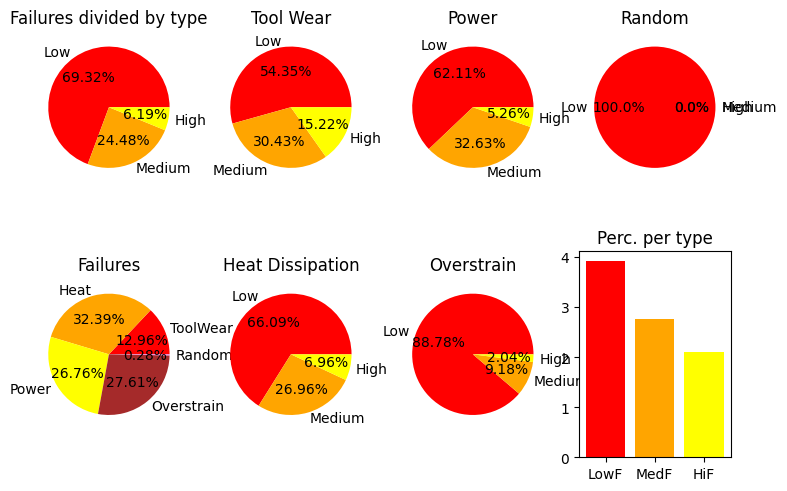

In [ ]:
#rename columns #type(quality) #failures(desarroyando acronimos)
#import matplotlib.pyplot as plt
#fig, ax = plt.subplots(2,2)

#def perc_value(val): 
#  return str(round(val,2)) + "%"
#machnf = df[( df['Machine failure'] == 0 ) & ( df['Type'] == 'L' )]['Product ID'].count()
#machf = df[( df['Machine failure'] == 1 ) & ( df['Type'] == 'L' )]['Product ID'].count()
#x = [machnf,machf]
#ax[0,0].pie(x,colors=['green','red'],labels=["Machines w/ no failure","Machines w/ failure"],autopct=perc_value)
#machnf = df[( df['Machine failure'] == 0 ) & ( df['Type'] == 'M' )]['Product ID'].count()
#machf = df[( df['Machine failure'] == 1 ) & ( df['Type'] == 'M' )]['Product ID'].count()
#x = [machnf,machf]
#ax[0,1].pie(x,colors=['green','red'],labels=["Machines w/ no failure","Machines w/ failure"],autopct=perc_value)
#machnf = df[( df['Machine failure'] == 0 ) & ( df['Type'] == 'H' )]['Product ID'].count()
#machf = df[( df['Machine failure'] == 1 ) & ( df['Type'] == 'H' )]['Product ID'].count()
#x = [machnf,machf]
#ax[1,0].pie(x,colors=['green','red'],labels=["Machines w/ no failure","Machines w/ failure"],autopct=perc_value)

#print(df[df['Machine failure'] == 1].groupby(by='Type').agg({'Type':'count'}))

import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,4,figsize=(9,6), dpi = 100)

def perc_value(val): 
  return str(round(val,2)) + "%"

machfl = df[( df['Machine failure'] == 1 ) & ( df['Type'] == 'L' )]['Product ID'].count()
machfm = df[( df['Machine failure'] == 1 ) & ( df['Type'] == 'M' )]['Product ID'].count()
machfh = df[( df['Machine failure'] == 1 ) & ( df['Type'] == 'H' )]['Product ID'].count()
x = [machfl,machfm,machfh]
ax[0,0].set_title("Failures divided by type")
ax[0,0].pie(x,colors=['red','orange','yellow'],labels=["Low","Medium","High"],autopct=perc_value)
#plt.show()
twf = df[( df['Machine failure'] == 1 ) & ( df['TWF'] == 1)]['Product ID'].count()
hdf = df[( df['Machine failure'] == 1 ) & ( df['HDF'] == 1)]['Product ID'].count()
pwf = df[( df['Machine failure'] == 1 ) & ( df['PWF'] == 1)]['Product ID'].count()
osf = df[( df['Machine failure'] == 1 ) & ( df['OSF'] == 1)]['Product ID'].count()
rnf = df[( df['Machine failure'] == 1 ) & ( df['RNF'] == 1)]['Product ID'].count()
x = [twf,hdf,pwf,osf,rnf]
ax[1,0].set_title("Failures")
ax[1,0].pie(x,colors=['red','orange','yellow','brown','violet'],labels=["ToolWear","Heat","Power","Overstrain","Random"],autopct=perc_value)



#TWF - Tool Wear Failure HDF - Heat Dissipation Failure
#PWF - Power Failure     OSF - Overstrain Failue RNF - Random Failures
#fig, ax5 = plt.subplots(2,3,figsize=(6,6), dpi = 100)
machfl = df[( df['Machine failure'] == 1 ) & ( df['Type'] == 'L' ) & ( df['TWF'] == 1)]['Product ID'].count()
machfm = df[( df['Machine failure'] == 1 ) & ( df['Type'] == 'M' ) & ( df['TWF'] == 1)]['Product ID'].count()
machfh = df[( df['Machine failure'] == 1 ) & ( df['Type'] == 'H' ) & ( df['TWF'] == 1)]['Product ID'].count()
x = [machfl,machfm,machfh]
ax[0,1].set_title("Tool Wear")
ax[0,1].pie(x,colors=['red','orange','yellow'],labels=["Low","Medium","High"],autopct=perc_value)
machfl = df[( df['Machine failure'] == 1 ) & ( df['Type'] == 'L' ) & ( df['HDF'] == 1)]['Product ID'].count()
machfm = df[( df['Machine failure'] == 1 ) & ( df['Type'] == 'M' ) & ( df['HDF'] == 1)]['Product ID'].count()
machfh = df[( df['Machine failure'] == 1 ) & ( df['Type'] == 'H' ) & ( df['HDF'] == 1)]['Product ID'].count()
x = [machfl,machfm,machfh]
ax[1,1].set_title("Heat Dissipation")
ax[1,1].pie(x,colors=['red','orange','yellow'],labels=["Low","Medium","High"],autopct=perc_value)
machfl = df[( df['Machine failure'] == 1 ) & ( df['Type'] == 'L' ) & ( df['PWF'] == 1)]['Product ID'].count()
machfm = df[( df['Machine failure'] == 1 ) & ( df['Type'] == 'M' ) & ( df['PWF'] == 1)]['Product ID'].count()
machfh = df[( df['Machine failure'] == 1 ) & ( df['Type'] == 'H' ) & ( df['PWF'] == 1)]['Product ID'].count()
x = [machfl,machfm,machfh]
ax[0,2].set_title("Power")
ax[0,2].pie(x,colors=['red','orange','yellow'],labels=["Low","Medium","High"],autopct=perc_value)
machfl = df[( df['Machine failure'] == 1 ) & ( df['Type'] == 'L' ) & ( df['OSF'] == 1)]['Product ID'].count()
machfm = df[( df['Machine failure'] == 1 ) & ( df['Type'] == 'M' ) & ( df['OSF'] == 1)]['Product ID'].count()
machfh = df[( df['Machine failure'] == 1 ) & ( df['Type'] == 'H' ) & ( df['OSF'] == 1)]['Product ID'].count()
x = [machfl,machfm,machfh]
ax[1,2].set_title("Overstrain")
ax[1,2].pie(x,colors=['red','orange','yellow'],labels=["Low","Medium","High"],autopct=perc_value)
machfl = df[( df['Machine failure'] == 1 ) & ( df['Type'] == 'L' ) & ( df['RNF'] == 1)]['Product ID'].count()
machfm = df[( df['Machine failure'] == 1 ) & ( df['Type'] == 'M' ) & ( df['RNF'] == 1)]['Product ID'].count()
machfh = df[( df['Machine failure'] == 1 ) & ( df['Type'] == 'H' ) & ( df['RNF'] == 1)]['Product ID'].count()
x = [machfl,machfm,machfh]
ax[0,3].set_title("Random")
ax[0,3].pie(x,colors=['red','orange','yellow'],labels=["Low","Medium","High"],autopct=perc_value)

#TWF - Tool Wear Failure HDF - Heat Dissipation Failure
#PWF - Power Failure     OSF - Overstrain Failue RNF - Random Failures
#twf = df[( df['Machine failure'] == 1 ) & ( df['TWF'] == 1)]['Product ID'].count()
#hdf = df[( df['Machine failure'] == 1 ) & ( df['HDF'] == 1)]['Product ID'].count()
#pwf = df[( df['Machine failure'] == 1 ) & ( df['PWF'] == 1)]['Product ID'].count()
#osf = df[( df['Machine failure'] == 1 ) & ( df['OSF'] == 1)]['Product ID'].count()
#rnf = df[( df['Machine failure'] == 1 ) & ( df['RNF'] == 1)]['Product ID'].count()
#x = [twf,hdf,pwf,osf,rnf]
#ax5[1,1].set_title("Failures")
#ax5[1,2].pie(x,colors=['red','orange','yellow','brown','violet'],labels=["ToolWear","Heat","Power","Overstrain","Random"],autopct=perc_value)

machfl = df[( df['Machine failure'] == 1 ) & ( df['Type'] == 'L' )]['Product ID'].count() * 100 / df[( df['Type'] == 'L' )]['Product ID'].count()
machfm = df[( df['Machine failure'] == 1 ) & ( df['Type'] == 'M' )]['Product ID'].count() * 100 / df[( df['Type'] == 'M' )]['Product ID'].count()
machfh = df[( df['Machine failure'] == 1 ) & ( df['Type'] == 'H' )]['Product ID'].count() * 100 / df[( df['Type'] == 'H' )]['Product ID'].count()
y = [machfl,machfm,machfh]
x = ['LowF','MedF','HiF']
ax[1,3].set_title("Perc. per type")
ax[1,3].bar(x,y,color=['red','orange','yellow'])

plt.show()

**Show the various types of failures w/ countage**

TWF  HDF  PWF  OSF  RNF
0    1    0    0    0      106
     0    1    0    0       80
          0    1    0       78
1    0    0    0    0       42
0    0    1    1    0       11
          0    0    0        9
     1    0    1    0        6
          1    0    0        3
1    0    0    1    0        2
               0    1        1
          1    1    0        1
dtype: int64

TWF - Tool Wear Failure HDF - Heat Dissipation Failure
PWF - Power Failure     OSF - Overstrain Failue RNF - Random Failures


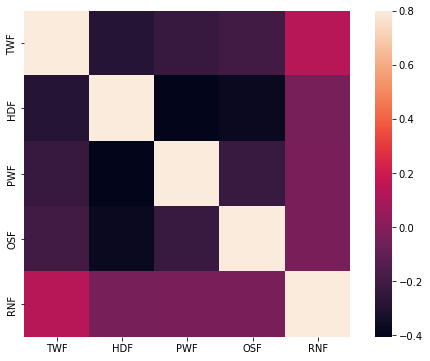

In [ ]:
#fig, ax = plt.subplots(2,2)

#df[(df["Machine failure"] == 1) & (df["Type"] == 'H')].groupby(by=['TWF','HDF','PWF','OSF','RNF']).count()


#import matplotlib.pyplot as plt
#fig, ax = plt.subplots()


display(df[df["Machine failure"] == 1][['TWF','HDF','PWF','OSF','RNF']].value_counts())

#ax[1,1].barh(x,y,linewidth=170,color=['green','red','green','red','green','red'])
#ax[1,1].bar(y,x,linewidth=170,color=['green','red','green','red','green','red'])
#ax[1,1].invert_xaxis()

#for index, value in enumerate(y):
#    plt.text(value, index, str(value))




#display(df[df["Machine failure"] == 1].groupby(by=['Type','TWF','HDF','PWF','OSF','RNF']).agg({'Product ID':'count'}))
print("TWF - Tool Wear Failure","HDF - Heat Dissipation Failure")
print("PWF - Power Failure","    OSF - Overstrain Failue","RNF - Random Failures")

#df[(df["Machine failure"] == 1) & (df["PWF"] == 1) & (df["OSF"] == 1)][['TWF','HDF','PWF','OSF','RNF']]
#machnf = df[df['Machine failure'] == 1]['Product ID'].count()
#machf = df[df['Machine failure'] == 1]['Product ID'].count()
#x = ['Machine w/ no failure','Machine w/ failure']
#y = [machnf,machf]
#ax[0,0].bar(x,y,linewidth=170,color=['green','red'])

df[df["Machine failure"] == 1][['TWF','HDF','PWF','OSF','RNF']].corr()

import seaborn as sns

f, ax = plt.subplots(figsize=(9, 6))
df_corr = df[df["Machine failure"] == 1][['TWF','HDF','PWF','OSF','RNF']].corr()
sns.heatmap(df_corr, vmax=.8, square=True)
plt.show()

**Correlation between atributes and machine failures**

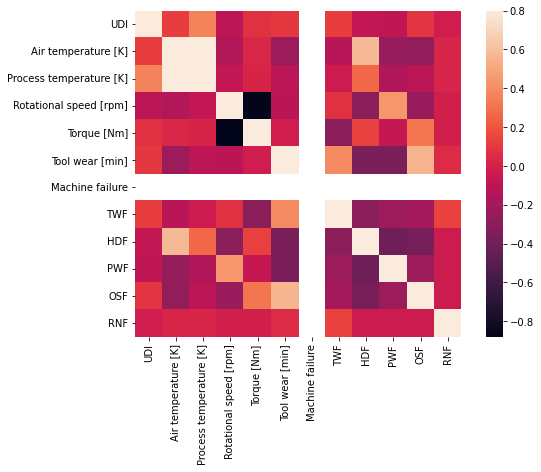

In [ ]:
import seaborn as sns
f, ax = plt.subplots(figsize=(9, 6))
df_corr = df[df["Machine failure"] == 1].corr()
sns.heatmap(df_corr, vmax=.8, square=True)
plt.show()


**The data between machine failure and atributes going higher is linked so everytime the atributes go higher per example for higher production**

**The unbalanced between machines with failures and without failures is connected to in regular use the atributes are in the mean**

**ADDED AFTER SHOWING ONLY THE MEANS WITH MANY DIFFERENT TYPES**

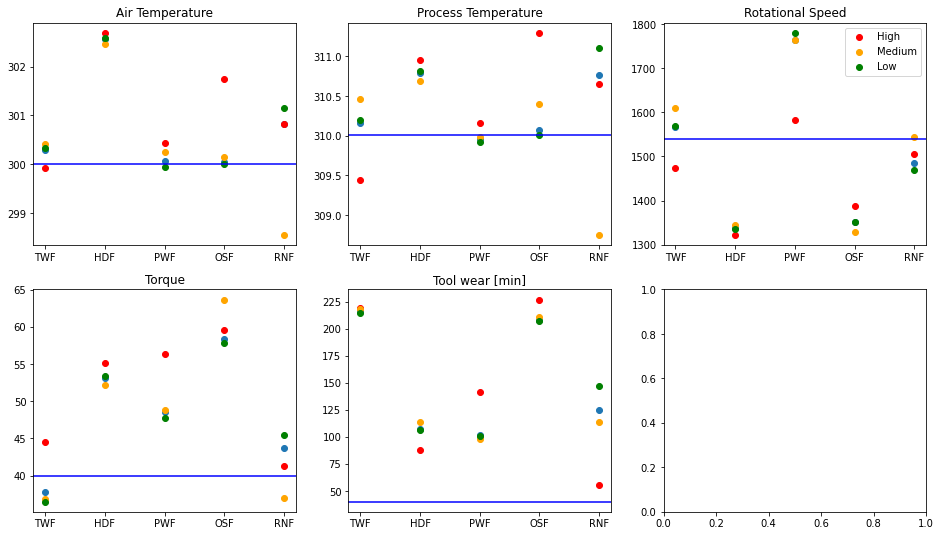

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,3,figsize=(16, 9))
#TWF - Tool Wear Failure HDF - Heat Dissipation Failure
#PWF - Power Failure     OSF - Overstrain Failue RNF - Random Failures
#df.describe()

x = ['TWF','HDF','PWF','OSF','RNF']
mean = df['Air temperature [K]'].mean()
y = mean
ax[0,0].set_title("Air Temperature")
ax[0,0].axhline(y, color='blue', linestyle='-')
y1 = df[df['TWF'] == 1]['Air temperature [K]'].mean()
y2 = df[df['HDF'] == 1]['Air temperature [K]'].mean()
y3 = df[df['PWF'] == 1]['Air temperature [K]'].mean()
y4 = df[df['OSF'] == 1]['Air temperature [K]'].mean()
y5 = df[df['RNF'] == 1]['Air temperature [K]'].mean()
y = [y1,y2,y3,y4,y5]
ax[0,0].scatter(x,y)
y1 = df[( df['TWF'] == 1 ) & ( df['Type'] == 'H')]['Air temperature [K]'].mean()
y2 = df[( df['HDF'] == 1 ) & ( df['Type'] == 'H')]['Air temperature [K]'].mean()
y3 = df[( df['PWF'] == 1 ) & ( df['Type'] == 'H')]['Air temperature [K]'].mean()
y4 = df[( df['OSF'] == 1 ) & ( df['Type'] == 'H')]['Air temperature [K]'].mean()
y5 = df[( df['RNF'] == 1 ) & ( df['Type'] == 'H')]['Air temperature [K]'].mean()
y = [y1,y2,y3,y4,y5]
ax[0,0].scatter(x,y,color='red',label='High')
y1 = df[( df['TWF'] == 1 ) & ( df['Type'] == 'M')]['Air temperature [K]'].mean()
y2 = df[( df['HDF'] == 1 ) & ( df['Type'] == 'M')]['Air temperature [K]'].mean()
y3 = df[( df['PWF'] == 1 ) & ( df['Type'] == 'M')]['Air temperature [K]'].mean()
y4 = df[( df['OSF'] == 1 ) & ( df['Type'] == 'M')]['Air temperature [K]'].mean()
y5 = df[( df['RNF'] == 1 ) & ( df['Type'] == 'M')]['Air temperature [K]'].mean()
y = [y1,y2,y3,y4,y5]
ax[0,0].scatter(x,y,color='orange',label='Medium')
y1 = df[( df['TWF'] == 1 ) & ( df['Type'] == 'L')]['Air temperature [K]'].mean()
y2 = df[( df['HDF'] == 1 ) & ( df['Type'] == 'L')]['Air temperature [K]'].mean()
y3 = df[( df['PWF'] == 1 ) & ( df['Type'] == 'L')]['Air temperature [K]'].mean()
y4 = df[( df['OSF'] == 1 ) & ( df['Type'] == 'L')]['Air temperature [K]'].mean()
y5 = df[( df['RNF'] == 1 ) & ( df['Type'] == 'L')]['Air temperature [K]'].mean()
y = [y1,y2,y3,y4,y5]
ax[0,0].scatter(x,y,color='green',label='Low')


mean = df['Process temperature [K]'].mean()
y = mean
ax[0,1].set_title("Process Temperature")
ax[0,1].axhline(y, color='blue', linestyle='-')
y1 = df[df['TWF'] == 1]['Process temperature [K]'].mean()
y2 = df[df['HDF'] == 1]['Process temperature [K]'].mean()
y3 = df[df['PWF'] == 1]['Process temperature [K]'].mean()
y4 = df[df['OSF'] == 1]['Process temperature [K]'].mean()
y5 = df[df['RNF'] == 1]['Process temperature [K]'].mean()
y = [y1,y2,y3,y4,y5]
ax[0,1].scatter(x,y)
y1 = df[( df['TWF'] == 1 ) & ( df['Type'] == 'H')]['Process temperature [K]'].mean()
y2 = df[( df['HDF'] == 1 ) & ( df['Type'] == 'H')]['Process temperature [K]'].mean()
y3 = df[( df['PWF'] == 1 ) & ( df['Type'] == 'H')]['Process temperature [K]'].mean()
y4 = df[( df['OSF'] == 1 ) & ( df['Type'] == 'H')]['Process temperature [K]'].mean()
y5 = df[( df['RNF'] == 1 ) & ( df['Type'] == 'H')]['Process temperature [K]'].mean()
y = [y1,y2,y3,y4,y5]
ax[0,1].scatter(x,y,color='red')
y1 = df[( df['TWF'] == 1 ) & ( df['Type'] == 'M')]['Process temperature [K]'].mean()
y2 = df[( df['HDF'] == 1 ) & ( df['Type'] == 'M')]['Process temperature [K]'].mean()
y3 = df[( df['PWF'] == 1 ) & ( df['Type'] == 'M')]['Process temperature [K]'].mean()
y4 = df[( df['OSF'] == 1 ) & ( df['Type'] == 'M')]['Process temperature [K]'].mean()
y5 = df[( df['RNF'] == 1 ) & ( df['Type'] == 'M')]['Process temperature [K]'].mean()
y = [y1,y2,y3,y4,y5]
ax[0,1].scatter(x,y,color='orange')
y1 = df[( df['TWF'] == 1 ) & ( df['Type'] == 'L')]['Process temperature [K]'].mean()
y2 = df[( df['HDF'] == 1 ) & ( df['Type'] == 'L')]['Process temperature [K]'].mean()
y3 = df[( df['PWF'] == 1 ) & ( df['Type'] == 'L')]['Process temperature [K]'].mean()
y4 = df[( df['OSF'] == 1 ) & ( df['Type'] == 'L')]['Process temperature [K]'].mean()
y5 = df[( df['RNF'] == 1 ) & ( df['Type'] == 'L')]['Process temperature [K]'].mean()
y = [y1,y2,y3,y4,y5]
ax[0,1].scatter(x,y,color='green')




mean = df['Rotational speed [rpm]'].mean()
y = mean
ax[0,2].set_title("Rotational Speed")
ax[0,2].axhline(y, color='blue', linestyle='-')
y1 = df[df['TWF'] == 1]['Rotational speed [rpm]'].mean()
y2 = df[df['HDF'] == 1]['Rotational speed [rpm]'].mean()
y3 = df[df['PWF'] == 1]['Rotational speed [rpm]'].mean()
y4 = df[df['OSF'] == 1]['Rotational speed [rpm]'].mean()
y5 = df[df['RNF'] == 1]['Rotational speed [rpm]'].mean()
y = [y1,y2,y3,y4,y5]
ax[0,2].scatter(x,y)
y1 = df[( df['TWF'] == 1 ) & ( df['Type'] == 'H')]['Rotational speed [rpm]'].mean()
y2 = df[( df['HDF'] == 1 ) & ( df['Type'] == 'H')]['Rotational speed [rpm]'].mean()
y3 = df[( df['PWF'] == 1 ) & ( df['Type'] == 'H')]['Rotational speed [rpm]'].mean()
y4 = df[( df['OSF'] == 1 ) & ( df['Type'] == 'H')]['Rotational speed [rpm]'].mean()
y5 = df[( df['RNF'] == 1 ) & ( df['Type'] == 'H')]['Rotational speed [rpm]'].mean()
y = [y1,y2,y3,y4,y5]
ax[0,2].scatter(x,y,color='red',label='High')
y1 = df[( df['TWF'] == 1 ) & ( df['Type'] == 'M')]['Rotational speed [rpm]'].mean()
y2 = df[( df['HDF'] == 1 ) & ( df['Type'] == 'M')]['Rotational speed [rpm]'].mean()
y3 = df[( df['PWF'] == 1 ) & ( df['Type'] == 'M')]['Rotational speed [rpm]'].mean()
y4 = df[( df['OSF'] == 1 ) & ( df['Type'] == 'M')]['Rotational speed [rpm]'].mean()
y5 = df[( df['RNF'] == 1 ) & ( df['Type'] == 'M')]['Rotational speed [rpm]'].mean()
y = [y1,y2,y3,y4,y5]
ax[0,2].scatter(x,y,color='orange',label='Medium')
y1 = df[( df['TWF'] == 1 ) & ( df['Type'] == 'L')]['Rotational speed [rpm]'].mean()
y2 = df[( df['HDF'] == 1 ) & ( df['Type'] == 'L')]['Rotational speed [rpm]'].mean()
y3 = df[( df['PWF'] == 1 ) & ( df['Type'] == 'L')]['Rotational speed [rpm]'].mean()
y4 = df[( df['OSF'] == 1 ) & ( df['Type'] == 'L')]['Rotational speed [rpm]'].mean()
y5 = df[( df['RNF'] == 1 ) & ( df['Type'] == 'L')]['Rotational speed [rpm]'].mean()
y = [y1,y2,y3,y4,y5]
ax[0,2].scatter(x,y,color='green',label='Low')



mean = df['Torque [Nm]'].mean()
y = mean
ax[1,0].set_title("Torque")
ax[1,0].axhline(y, color='blue', linestyle='-')
y1 = df[df['TWF'] == 1]['Torque [Nm]'].mean()
y2 = df[df['HDF'] == 1]['Torque [Nm]'].mean()
y3 = df[df['PWF'] == 1]['Torque [Nm]'].mean()
y4 = df[df['OSF'] == 1]['Torque [Nm]'].mean()
y5 = df[df['RNF'] == 1]['Torque [Nm]'].mean()
y = [y1,y2,y3,y4,y5]
ax[1,0].scatter(x,y)
y1 = df[( df['TWF'] == 1 ) & ( df['Type'] == 'H')]['Torque [Nm]'].mean()
y2 = df[( df['HDF'] == 1 ) & ( df['Type'] == 'H')]['Torque [Nm]'].mean()
y3 = df[( df['PWF'] == 1 ) & ( df['Type'] == 'H')]['Torque [Nm]'].mean()
y4 = df[( df['OSF'] == 1 ) & ( df['Type'] == 'H')]['Torque [Nm]'].mean()
y5 = df[( df['RNF'] == 1 ) & ( df['Type'] == 'H')]['Torque [Nm]'].mean()
y = [y1,y2,y3,y4,y5]
ax[1,0].scatter(x,y,color='red')
y1 = df[( df['TWF'] == 1 ) & ( df['Type'] == 'M')]['Torque [Nm]'].mean()
y2 = df[( df['HDF'] == 1 ) & ( df['Type'] == 'M')]['Torque [Nm]'].mean()
y3 = df[( df['PWF'] == 1 ) & ( df['Type'] == 'M')]['Torque [Nm]'].mean()
y4 = df[( df['OSF'] == 1 ) & ( df['Type'] == 'M')]['Torque [Nm]'].mean()
y5 = df[( df['RNF'] == 1 ) & ( df['Type'] == 'M')]['Torque [Nm]'].mean()
y = [y1,y2,y3,y4,y5]
ax[1,0].scatter(x,y,color='orange')
y1 = df[( df['TWF'] == 1 ) & ( df['Type'] == 'L')]['Torque [Nm]'].mean()
y2 = df[( df['HDF'] == 1 ) & ( df['Type'] == 'L')]['Torque [Nm]'].mean()
y3 = df[( df['PWF'] == 1 ) & ( df['Type'] == 'L')]['Torque [Nm]'].mean()
y4 = df[( df['OSF'] == 1 ) & ( df['Type'] == 'L')]['Torque [Nm]'].mean()
y5 = df[( df['RNF'] == 1 ) & ( df['Type'] == 'L')]['Torque [Nm]'].mean()
y = [y1,y2,y3,y4,y5]
ax[1,0].scatter(x,y,color='green')


mean = df['Torque [Nm]'].mean()
y = mean
ax[1,1].set_title("Tool wear [min]")
ax[1,1].axhline(y, color='blue', linestyle='-')
y1 = df[df['TWF'] == 1]['Tool wear [min]'].mean()
y2 = df[df['HDF'] == 1]['Tool wear [min]'].mean()
y3 = df[df['PWF'] == 1]['Tool wear [min]'].mean()
y4 = df[df['OSF'] == 1]['Tool wear [min]'].mean()
y5 = df[df['RNF'] == 1]['Tool wear [min]'].mean()
y = [y1,y2,y3,y4,y5]
ax[1,1].scatter(x,y)
y1 = df[( df['TWF'] == 1 ) & ( df['Type'] == 'H')]['Tool wear [min]'].mean()
y2 = df[( df['HDF'] == 1 ) & ( df['Type'] == 'H')]['Tool wear [min]'].mean()
y3 = df[( df['PWF'] == 1 ) & ( df['Type'] == 'H')]['Tool wear [min]'].mean()
y4 = df[( df['OSF'] == 1 ) & ( df['Type'] == 'H')]['Tool wear [min]'].mean()
y5 = df[( df['RNF'] == 1 ) & ( df['Type'] == 'H')]['Tool wear [min]'].mean()
y = [y1,y2,y3,y4,y5]
ax[1,1].scatter(x,y,color='red')
y1 = df[( df['TWF'] == 1 ) & ( df['Type'] == 'M')]['Tool wear [min]'].mean()
y2 = df[( df['HDF'] == 1 ) & ( df['Type'] == 'M')]['Tool wear [min]'].mean()
y3 = df[( df['PWF'] == 1 ) & ( df['Type'] == 'M')]['Tool wear [min]'].mean()
y4 = df[( df['OSF'] == 1 ) & ( df['Type'] == 'M')]['Tool wear [min]'].mean()
y5 = df[( df['RNF'] == 1 ) & ( df['Type'] == 'M')]['Tool wear [min]'].mean()
y = [y1,y2,y3,y4,y5]
ax[1,1].scatter(x,y,color='orange')
y1 = df[( df['TWF'] == 1 ) & ( df['Type'] == 'L')]['Tool wear [min]'].mean()
y2 = df[( df['HDF'] == 1 ) & ( df['Type'] == 'L')]['Tool wear [min]'].mean()
y3 = df[( df['PWF'] == 1 ) & ( df['Type'] == 'L')]['Tool wear [min]'].mean()
y4 = df[( df['OSF'] == 1 ) & ( df['Type'] == 'L')]['Tool wear [min]'].mean()
y5 = df[( df['RNF'] == 1 ) & ( df['Type'] == 'L')]['Tool wear [min]'].mean()
y = [y1,y2,y3,y4,y5]
ax[1,1].scatter(x,y,color='green')
ax[0,2].legend()


plt.show()


** Sort of conclusion **
**2022/02/18 in terms of mean the high quality fails in higher means so it have more resilience** **NEW after showing**


**BELOW IS STUFF OUTSIDE SCOPE OF STUDY** **TEST STUFF WHILE DOING**
---



**Discovering difference between 'Types' and failures above mean, if higher quality machines can work above mean without failure**

In [ ]:
#mean = df['Air temperature [K]'].mean()
#mean = df[df['Machine failure'] == 1]['Air temperature [K]'].mean()
#print(mean)
#df.groupby(['Type','Machine failure','HDF']).agg({'Air temperature [K]': ['mean', 'median', 'min', 'max']},{'Process temperature [K]': ['mean', 'median', 'min', 'max']})
#df.groupby(['Type','Machine failure','PWF']).agg({'Air temperature [K]': ['mean', 'median', 'min', 'max']},{'Process temperature [K]': ['mean', 'median', 'min', 'max']})
#df.groupby(['Type','Machine failure','OSF']).agg({'Air temperature [K]': ['mean', 'median', 'min', 'max']},{'Process temperature [K]': ['mean', 'median', 'min', 'max']})
#df.groupby(['Type','Machine failure','RNF']).agg({'Air temperature [K]': ['mean', 'median', 'min', 'max']},{'Process temperature [K]': ['mean', 'median', 'min', 'max']})

#df.groupby(['Type','Machine failure','TWF']).agg({'Air temperature [K]': ['mean', 'median', 'min', 'max']},{'Process temperature [K]': ['mean', 'median', 'min', 'max']})


Air temperature [K]                      
                                        mean  median    min    max
Type Machine failure TWF                                          
H    0               0            299.839511  299.70  295.5  304.2
     1               0            301.764286  302.40  296.6  304.0
                     1            299.928571  300.50  296.9  302.6
L    0               0            299.985637  300.10  295.3  304.5
     1               0            300.806190  301.40  295.6  304.0
                     1            300.340000  300.60  297.1  304.4
M    0               0            299.996294  300.10  295.3  304.4
     1               0            301.344928  302.10  295.8  303.7
                     1            300.407143  300.35  297.4  303.9

300.886430678466
299.9827166927225
299.9998628257892
299.83442288049
310.00555999999995
313.8
313.8
313.5
1538.7761
2695
2456
2636


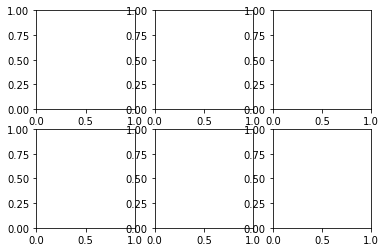

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,3)

#dff = df[( df['TWF'] == 0 ) & ( df['HDF'] == 0 ) & ( df['PWF'] == 0) & ( df['OSF'] == 0 ) & ( df['RNF'] == 0 )]
mean = df[df['Machine failure'] == 1]['Air temperature [K]'].mean()
print(mean)
count = dff[dff['Type'] == 'L']['Air temperature [K]'].mean()
print(count)
max = dff[dff['Type'] == 'M']['Air temperature [K]'].mean()
print(max)
max = dff[dff['Type'] == 'H']['Air temperature [K]'].mean()
print(max)
mean = df['Process temperature [K]'].mean()
print(mean)
max = dff[dff['Type'] == 'L']['Process temperature [K]'].max()
print(max)
max = dff[dff['Type'] == 'M']['Process temperature [K]'].max()
print(max)
max = dff[dff['Type'] == 'H']['Process temperature [K]'].max()
print(max)
mean = df['Rotational speed [rpm]'].mean()
print(mean)
max = dff[dff['Type'] == 'L']['Rotational speed [rpm]'].max()
print(max)
max = dff[dff['Type'] == 'M']['Rotational speed [rpm]'].max()
print(max)
max = dff[dff['Type'] == 'H']['Rotational speed [rpm]'].max()
print(max)

**Plot in green machines whith no failure while in red machines that have failed**

Type
H    1003
L    6000
M    2997
Name: Product ID, dtype: int64


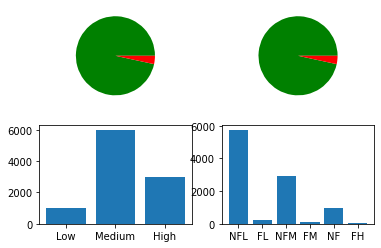

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,2)

#data - pie
machnf = df[df['Machine failure'] == 0]['Product ID'].count()
machf = df[df['Machine failure'] == 1]['Product ID'].count()
x = [machnf,machf]
ax[0,1].pie(x,colors=['green','red'])
ax[0,0].pie(x,colors=['green','red'])

# plot
x = ['Low','Medium','High']
y = df.groupby(by=['Type'])['Product ID'].count()
print(y)
ax[1,0].bar(x,y)


#data - barplot
x = ['NFL','FL','NFM','FM','NF','FH']
nfl = df[( df['Machine failure'] == 0 ) &  ( df['Type'] == 'L' )]['Product ID'].count()
fl = df[( df['Machine failure'] == 1 ) &  ( df['Type'] == 'L' )]['Product ID'].count()
nfm = df[( df['Machine failure'] == 0 ) &  ( df['Type'] == 'M' )]['Product ID'].count()
fm = df[( df['Machine failure'] == 1 ) &  ( df['Type'] == 'M' )]['Product ID'].count()
nfh = df[( df['Machine failure'] == 0 ) &  ( df['Type'] == 'H' )]['Product ID'].count()
fh = df[( df['Machine failure'] == 1 ) &  ( df['Type'] == 'H' )]['Product ID'].count()
y = [nfl,fl,nfm,fm,nfh,fh]
ax[1,1].bar(x,y,linewidth=170)


plt.show()

**It is dataframe representing information from a machine-learning-database ?regarding predictivness of machine failure taking in account it constituition?**

**Knowing my data**

In [ ]:
print("It have as columns constitution \n\n",df.columns,"\n\n  the described as \n\n",df.describe())

It have as columns constitution 

 Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object') 

  the described as 

                UDI  Air temperature [K]  ...           OSF          RNF
count  10000.00000         10000.000000  ...  10000.000000  10000.00000
mean    5000.50000           300.004930  ...      0.009800      0.00190
std     2886.89568             2.000259  ...      0.098514      0.04355
min        1.00000           295.300000  ...      0.000000      0.00000
25%     2500.75000           298.300000  ...      0.000000      0.00000
50%     5000.50000           300.100000  ...      0.000000      0.00000
75%     7500.25000           301.500000  ...      0.000000      0.00000
max    10000.00000           304.500000  ...      1.000000      1.00000

[8 rows x 12 columns]
